In [15]:
import pandas as pd

# Cargar el dataset original
df = pd.read_csv("edges_final.csv", sep=";")
columnas_si = [
    "u", "v", 
    "Fallecidos", "Graves", "Menos_Grav", "Leves", "Ilesos",

    # Estado de la calzada (No hay info, todos son ceros)
    #"Estado_Cal__MALO", "Estado_Cal__REGULAR",

    # Tipo de calzada
    "Tipo_Calza__ADOQUIN", 
    "Tipo_Calza__ASFALTO",
    "Tipo_Calza__CONCRETO", 
    "Tipo_Calza__MIXTO",
    #"Tipo_Calza__RIPIO", 
    #"Tipo_Calza__TIERRA",

    # Tipo de vía (Calzada)
    "Calzada__BIDIRECCIONAL",
    "Calzada__BIDIRECCIONAL CON BANDEJON",
    "Calzada__UNIDIRECCIONAL",

    # Zona
    #"Zona__RURAL", "Zona__URBANA",

    # Ubicación
    #"Ubicación__ACERA O BERMA",
    #"Ubicación__CRUCE CON SEMAFORO APAGADO",
    #"Ubicación__CRUCE CON SEMAFORO FUNCIONANDO",
    "Ubicación__CRUCE CON SEÑAL CEDA EL PASO",
    "Ubicación__CRUCE CON SEÑAL PARE",
    #"Ubicación__CRUCE REGULADO POR CARABINERO",
    #"Ubicación__CRUCE SIN SEÑALIZACION",
    #"Ubicación__ENLACE A DESNIVEL",
    #"Ubicación__ENLACE A NIVEL",
    #"Ubicación__OTROS NO CONSIDERADOS",
    #"Ubicación__PLAZA DE PEAJE",
    #"Ubicación__PUENTE",
    #"Ubicación__ROTONDA",
    #"Ubicación__TRAMO DE VIA CURVA HORIZONTAL",
    #"Ubicación__TRAMO DE VIA CURVA VERTICAL",
    "Ubicación__TRAMO DE VIA RECTA",
    #"Ubicación__TUNEL",

    # Tipos de carretera
    #"hw_busway", 
    "hw_living_street", 
    #"hw_motorway", 
    #"hw_motorway_link",
    "hw_primary", 
    "hw_primary_link", 
    "hw_residential",
    "hw_secondary", 
    "hw_secondary_link", 
    "hw_tertiary",
    "hw_tertiary_link", 
    #"hw_trunk",
    #"hw_unclassified",

    # Límites de velocidad
    "ms_10", "ms_100", "ms_120", "ms_15", "ms_20",
    "ms_30", "ms_35", "ms_40", "ms_45","ms_5", "ms_50",
    "ms_60", "ms_70", "ms_80",

    # Longitud
    "length_m"
]


# Filtrar dataset
df_nuevo = df[columnas_si]

# Guardar el dataset
df_nuevo.to_csv("edges.csv", index=False)


Reemplazamos los valores vacios por 0

In [16]:
df = df_nuevo
df = df.replace("", 0)        # reemplaza strings vacíos
df = df.fillna(0)             # reemplaza NaN con 0
df.to_csv("edges.csv", index=False)

Reemplazamos todos los false por 0 lo mismo con los true

In [17]:
df = df.replace({False: 0, True: 1})
df.to_csv("edges.csv", index=False)

C:\Users\maxil\AppData\Local\Temp\ipykernel_16840\3576661446.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({False: 0, True: 1})


Cambiamos el nombre
* Tipo_Calza__ADOQUIN = Tipo_calle_adoquin
* Tipo_Calza__ASFALTO = Tipo_calle_asfalto
* Tipo_Calza__CONCRETO = Tipo_calle_concreto
* Tipo_Calza__MIXTO = Tipo_calle_mixto
* Tipo_Calza__RIPIO = Tipo_calle_ripio
* Tipo_Calza__TIERRA = Tipo_calle_tierra



In [ ]:
df = df.rename(columns={
    "Tipo_Calza__ADOQUIN": "Tipo_calle_adoquin",
    "Tipo_Calza__ASFALTO": "Tipo_calle_asfalto",
    "Tipo_Calza__CONCRETO": "Tipo_calle_concreto",
    "Tipo_Calza__MIXTO": "Tipo_calle_mixto",
})
df.to_csv("edges.csv", index=False)


El 1 lo obtiene la columna con el valor más alto en esa fila.

Si todas son 0, entonces la columna ganadora será Tipo_calle_asfalto.

In [1]:
import numpy as np
import pandas as pd
# Aqui lo abro denuevo porque cerré el vscode
df = pd.read_csv("edges.csv", sep=",")
cols = [
    "Tipo_calle_adoquin",
    "Tipo_calle_asfalto",
    "Tipo_calle_concreto",
    "Tipo_calle_mixto"
]

# Convertir a matriz numpy (mucho más rápido)
M = df[cols].to_numpy()

# Obtener índice del máximo por fila
argmax = np.argmax(M, axis=1)

# Detectar filas donde todos son 0
all_zero = (M.sum(axis=1) == 0)

# Si todo es cero → forzar índice que corresponde a "Tipo_calle_asfalto"
idx_asfalto = cols.index("Tipo_calle_asfalto")
argmax[all_zero] = idx_asfalto

# Crear una matriz de 0s para el one-hot
onehot = np.zeros_like(M, dtype=int)
onehot[np.arange(len(M)), argmax] = 1

# Reemplazar columnas originales por el nuevo one-hot
df[cols] = onehot
df.to_csv("edges.csv", index=False)

Ahora nos ocupamos de la dirección de la calzada, borramos "Calzada__BIDIRECCIONAL" y  "Calzada__BIDIRECCIONAL CON BANDEJON", dejamos calzada unidireccional, si es mayor que 1 entonces es 1 y si es cero, es cero, luego la renombramos como direccion_calle

In [ ]:

df = pd.read_csv("edges.csv", sep=",")

# 1. Normalizar Calzada__UNIDIRECCIONAL: si >0 → 1, si 0 → 0
df["Calzada__UNIDIRECCIONAL"] = (df["Calzada__UNIDIRECCIONAL"] > 0).astype(int)

# 2. Renombrar la columna
df = df.rename(columns={"Calzada__UNIDIRECCIONAL": "direccion_calle"})

# 3. Eliminar columnas que ya no usaremos
cols_to_drop = [
    "Calzada__BIDIRECCIONAL",
    "Calzada__BIDIRECCIONAL CON BANDEJON"
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# 4. Guardar resultado
df.to_csv("edges.csv", index=False)


Con respecto a estas columnas:
* "Ubicación__CRUCE CON SEÑAL CEDA EL PASO", # Hay pocos casi 20%, Se normaliza y se deja
* "Ubicación__CRUCE CON SEÑAL PARE", # Hay poco tambien casi 30%, se deja y se normaliza

In [7]:
# Acotar a 1 la columna CEDA EL PASO
df["Ubicación__CRUCE CON SEÑAL CEDA EL PASO"] = df["Ubicación__CRUCE CON SEÑAL CEDA EL PASO"].clip(upper=1)

# Renombrar a Señal_ceda_el_paso
df = df.rename(columns={
    "Ubicación__CRUCE CON SEÑAL CEDA EL PASO": "Señal_ceda_el_paso"
})

# Acotar a 1 la columna PARE
df["Ubicación__CRUCE CON SEÑAL PARE"] = df["Ubicación__CRUCE CON SEÑAL PARE"].clip(upper=1)

# Renombrar a Señal_pare
df = df.rename(columns={
    "Ubicación__CRUCE CON SEÑAL PARE": "Señal_pare"
})

df.to_csv("edges.csv", index=False)


Y renombramos "Ubicación__TRAMO DE VIA RECTA" por "Calle_recta" y sera 1 si la columna de antes es 1 y 0 si no lo es.

In [16]:
df = pd.read_csv("edges.csv")

print(df.columns.tolist())


['u', 'v', 'Fallecidos', 'Graves', 'Menos_Grav', 'Leves', 'Ilesos', 'Tipo_calle_adoquin', 'Tipo_calle_asfalto', 'Tipo_calle_concreto', 'Tipo_calle_mixto', 'direccion_calle', 'Señal_ceda_el_paso', 'Señal_pare', 'Ubicacion__TRAMO_VIA_RECTA', 'hw_living_street', 'hw_primary', 'hw_primary_link', 'hw_residential', 'hw_secondary', 'hw_secondary_link', 'hw_tertiary', 'hw_tertiary_link', 'ms_10', 'ms_100', 'ms_120', 'ms_15', 'ms_20', 'ms_30', 'ms_35', 'ms_40', 'ms_45', 'ms_5', 'ms_50', 'ms_60', 'ms_70', 'ms_80', 'length_m']


In [17]:
# Cambie el nombre directmanete: Ubicacion__TRAMO_VIA_RECTA
# Convertir a 1 si es >= 1, de lo contrario 0
df["Ubicacion__TRAMO_VIA_RECTA"] = (df["Ubicacion__TRAMO_VIA_RECTA"] >= 1).astype(int)

# Renombrar la columna
df = df.rename(columns={
    "Ubicacion__TRAMO_VIA_RECTA": "Calle_recta"
})

df.to_csv("edges.csv", index=False)

De las siguientes columnas:

* "hw_living_street", : Calle prioridad para peatones (hay casi un 10%)

* "hw_primary": Hay cerca de un 30% Carretera grande
* "hw_primary_link", : Pocos datos

* "hw_residential",: Cerca de 40% weno Calle residencial

* "hw_secondary",: Carreteras secundarias 


* "hw_tertiary",: Calles o carreteras terciarias: conecta comunas (casi un 30 %)
* "hw_tertiary_link", Solo 2 datos distintos, 




In [18]:

# Renombramos las columnas
df = df.rename(columns={
    "hw_living_street": "Calle_prioridad_peatones",
    "hw_primary": "Calle_principal",
    "hw_secondary": "Calle_secundaria",
    "hw_tertiary": "Calle_terciaria",
    "hw_residential": "Calle_residencial"
})

df.to_csv("edges.csv", index=False)

Dropeamos las hw_primary_link y el resto de link

In [20]:
df = pd.read_csv("edges.csv")
df = df.drop(columns=["hw_primary_link",
                "hw_secondary_link",
                "hw_tertiary_link"])

df.to_csv("edges.csv", index=False)

Definimos un one-hot encoding para manejar la velocidad máxima

In [21]:
# Lista de columnas de velocidad
vel_cols = [
    "ms_5","ms_10","ms_15","ms_20","ms_30","ms_35","ms_40","ms_45",
    "ms_50","ms_60","ms_70","ms_80","ms_100","ms_120"
]

# 1. Obtener la velocidad seleccionada en cada fila (la mayor que tenga un 1)
df["max_velocidad"] = (
    df[vel_cols]
    .apply(lambda row: int(row[row == 1].index.str.extract("(\d+)$").astype(int).max())
           if any(row == 1) else 0, axis=1)
)

# 2. One-hot encoding de la velocidad resultante
df = pd.get_dummies(df, columns=["max_velocidad"], prefix="vel")

# 3. Guardar si quieres
df.to_csv("edges.csv", index=False)


C:\Users\maxil\AppData\Local\Temp\ipykernel_4044\1757546383.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  .apply(lambda row: int(row[row == 1].index.str.extract("(\d+)$").astype(int).max())
C:\Users\maxil\AppData\Local\Temp\ipykernel_4044\1757546383.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  .apply(lambda row: int(row[row == 1].index.str.extract("(\d+)$").astype(int).max())
C:\Users\maxil\AppData\Local\Temp\ipykernel_4044\1757546383.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  .apply(lambda row: int(row[row == 1].index.str.extract("(\d+)$").astype(int).max())
C:\Users\maxil\AppData\Local\Temp\ipykernel_4044\1757546383.py:10: FutureWarning: Calling int on a single element Series is 

In [22]:
# 4. Eliminar las columnas de velocidad antiguas
df = df.drop(columns=vel_cols)
# 5. Convertir cualquier booleano que quede a 0/1 (por seguridad)
df = df.astype(int)

# 6. Guardar
df.to_csv("edges.csv", index=False)

# Sobre la columna del largo de las calles

Renombramos el largo de la calle y redondeamos su valor

In [33]:
df = pd.read_csv("edges.csv")
df = df.rename(columns={"length_m": "Largo_calle"})
df["Largo_calle"] = df["Largo_calle"].round(2)
df.to_csv("edges.csv", index=False)

Distribuimos los datos del largo de las calles y de ahí los separamos en cuartiles

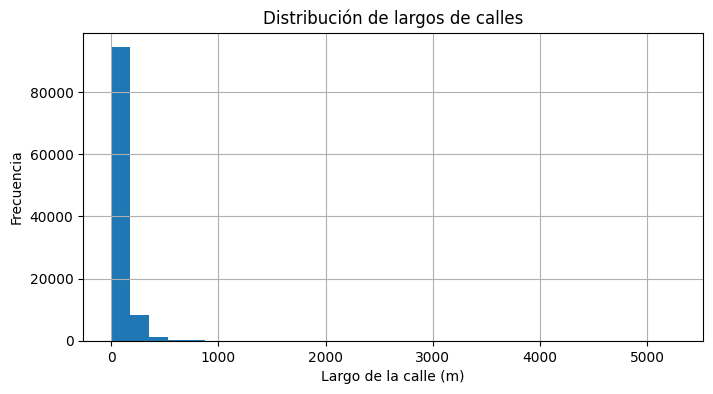

In [34]:
import matplotlib.pyplot as plt

# Columna de largos (cambia el nombre si es otro)
col = "Largo_calle"
    
plt.figure(figsize=(8,4))
plt.hist(df[col], bins=30)
plt.xlabel("Largo de la calle (m)")
plt.ylabel("Frecuencia")
plt.title("Distribución de largos de calles")
plt.grid(True)
plt.show()


No vamos a usar los quantiles, usaremos una normalización basada en log

In [35]:
import numpy as np

# Crear columna log
df["Largo_calle_log"] = np.log1p(df["Largo_calle"])

# Normalizar entre 0 y 1
df["Largo_calle_norm"] = (df["Largo_calle_log"] - df["Largo_calle_log"].min()) / (df["Largo_calle_log"].max() - df["Largo_calle_log"].min())
#df = df.drop(columns=["Largo_calle", "length_log"])
df.to_csv("edges.csv", index=False)

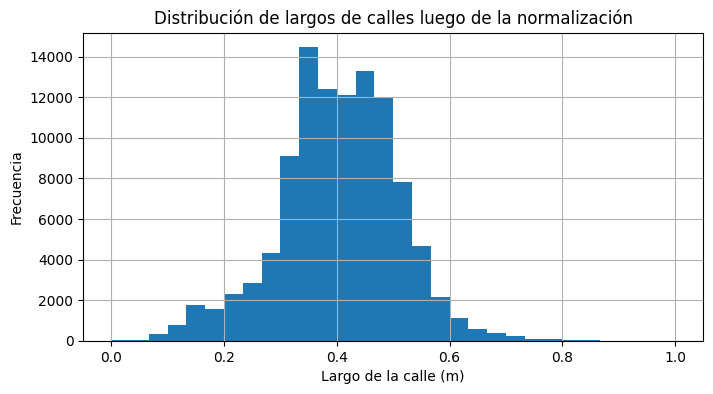

In [36]:
# Columna de largos (cambia el nombre si es otro)
col = "Largo_calle_norm"
    
plt.figure(figsize=(8,4))
plt.hist(df[col], bins=30)
plt.xlabel("Largo de la calle (m)")
plt.ylabel("Frecuencia")
plt.title("Distribución de largos de calles luego de la normalización")
plt.grid(True)
plt.show()

In [37]:
df = df.drop(columns=["Largo_calle", "Largo_calle_log"])
df.to_csv("edges.csv", index=False)

# Sobre el dataset edges_plus.csv

El dataset que se genera a contiuación es considerando las filas repetidas siempre que la dirección_calle sea 0
 

In [39]:
df = pd.read_csv("edges.csv")
# Filas unidireccionales (Direccion_calle = 1): se mantienen igual
df_uni = df[df["direccion_calle"] == 1].copy()

# Filas bidireccionales (Direccion_calle = 0): se duplican e invierten
df_bi = df[df["direccion_calle"] == 0].copy()
df_bi_invertida = df_bi.copy()

# Intercambiar u y v
df_bi_invertida[["u", "v"]] = df_bi_invertida[["v", "u"]]

# Unir todo
df_final = pd.concat([df_uni, df_bi, df_bi_invertida], ignore_index=True)

# Eliminar la columna ya procesada
df_final = df_final.drop(columns=["direccion_calle"])

# Guardar si quieres
df_final.to_csv("edges_plus.csv", index=False)

#df_final.head()
